```
Pseudocode:
	initialize population of N=500 agents with m_0=500 => <m>=1
	for 10^3-10^4 runs
		for 10^7 transactions
			randomly pick two agents
			trade:
				m_i' = e(m_i+m_j)
				m_j'= (1-e)(m_i+m_j)
			reject if m_i' or m_j' < 0 (no debt)
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from scipy.stats import pareto
%matplotlib notebook

  0%|          | 0/10000 [00:00<?, ?it/s]

C:\Users\Tebe\AppData\Local\Temp/ipykernel_8784/3954639248.py:23: RuntimeWarning: overflow encountered in exp
  if random0<np.exp(-delta_m / m_0) and random1<np.exp(-delta_m / m_1):


6401


<IPython.core.display.Javascript object>


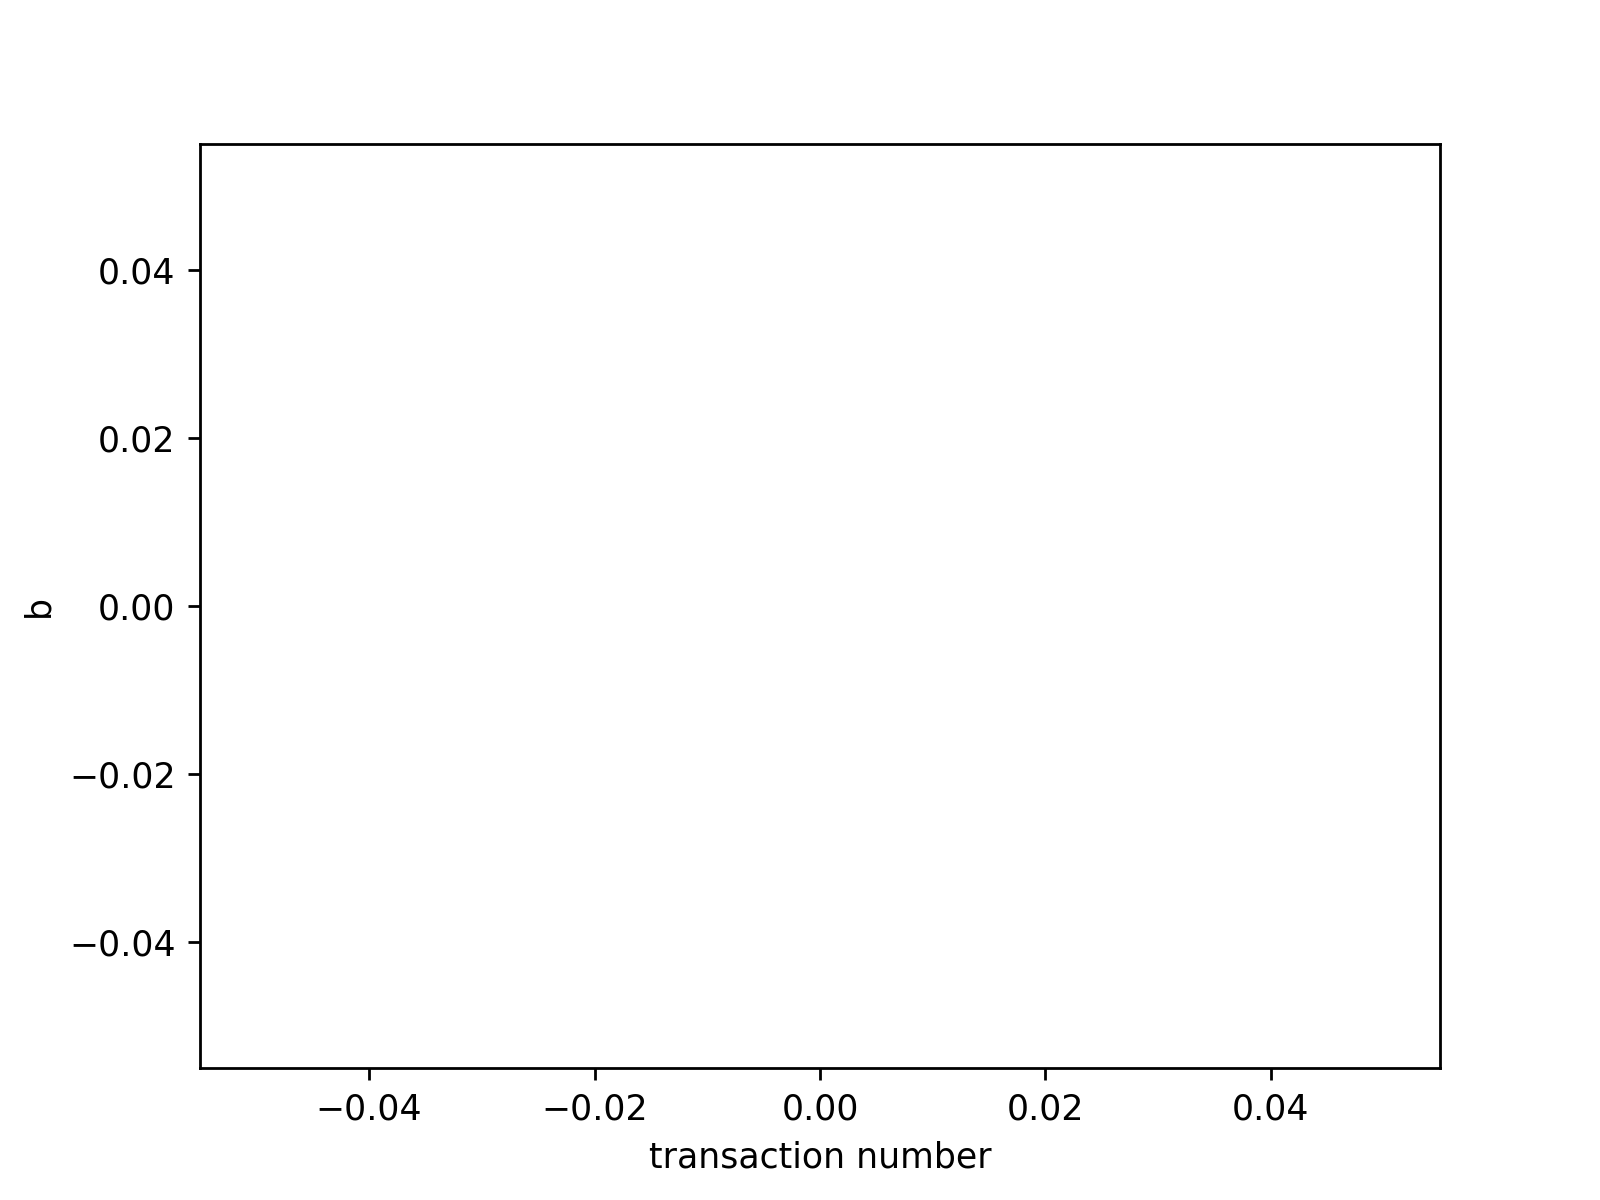

In [2]:
num_agents = 500
num_transactions =1e4
save_percent = 0.0

df = pd.DataFrame({'ID':np.arange(num_agents, dtype=int), 'wealth':np.ones(num_agents)})
num_counter = 0

n_rr = []
b_rr = []
for n in tqdm(np.arange(num_transactions)):
    transaction_df = df.sample(n=2)
    m_0 = transaction_df.iloc[0].wealth
    m_1 = transaction_df.iloc[1].wealth
    ID0 = transaction_df.iloc[0].ID
    ID1 = transaction_df.iloc[1].ID
    eps = np.random.rand(1)
    delta_m = (1.-save_percent) * (eps * m_1 - (1.-eps) * m_0)
    m_0_new = m_0 + delta_m
    m_1_new = m_1 - delta_m
    random0 = np.random.rand(1) 
    random1 = np.random.rand(1) 
    if m_0_new>0 and m_1_new>0:
        if random0<np.exp(-delta_m / m_0) and random1<np.exp(-delta_m / m_1):
            df.at[int(ID0), 'wealth'] = m_0_new
            df.at[int(ID1), 'wealth'] = m_1_new
            num_counter += 1
#    if n%10000==0:
#        b, loc, scale = pareto.fit(df.wealth)
#        n_rr.append(n)
#        b_rr.append(b)
print(num_counter)
fig, ax = plt.subplots()
ax.plot(n_rr, b_rr, '--o', c='purple', alpha=0.6, mec='black')
ax.set_xlabel('transaction number')
ax.set_ylabel('b');

<IPython.core.display.Javascript object>


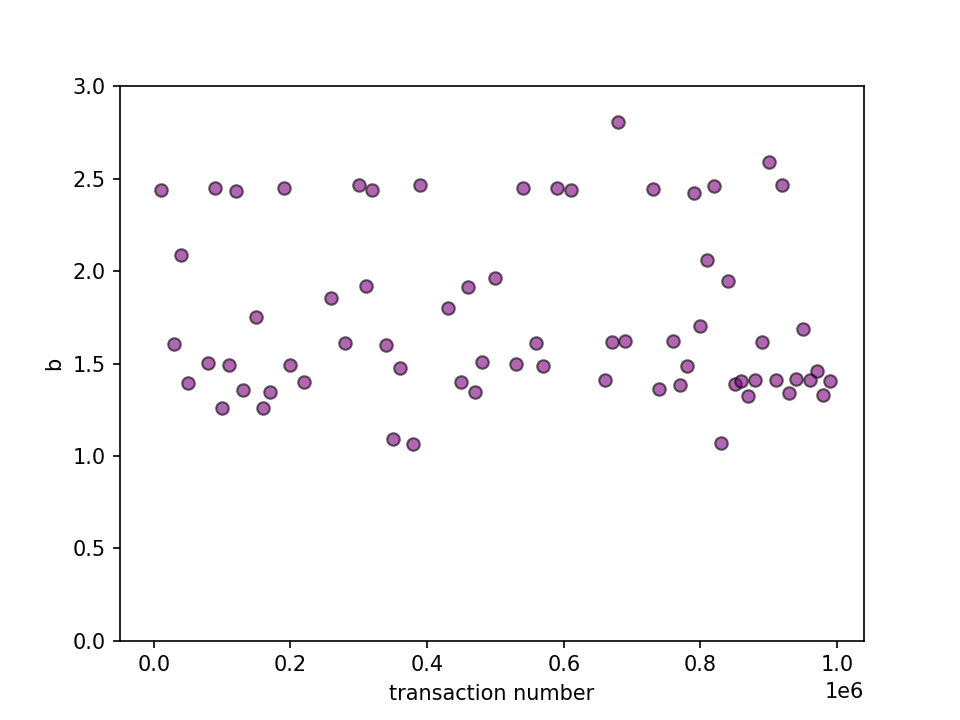

(0.0, 3.0)

In [3]:
fig, ax = plt.subplots()
ax.plot(n_rr, b_rr, 'o', c='purple', alpha=0.6, mec='black')
ax.set_xlabel('transaction number')
ax.set_ylabel('b')
ax.set_ylim(0,3)

C:\Users\Tebe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


<IPython.core.display.Javascript object>


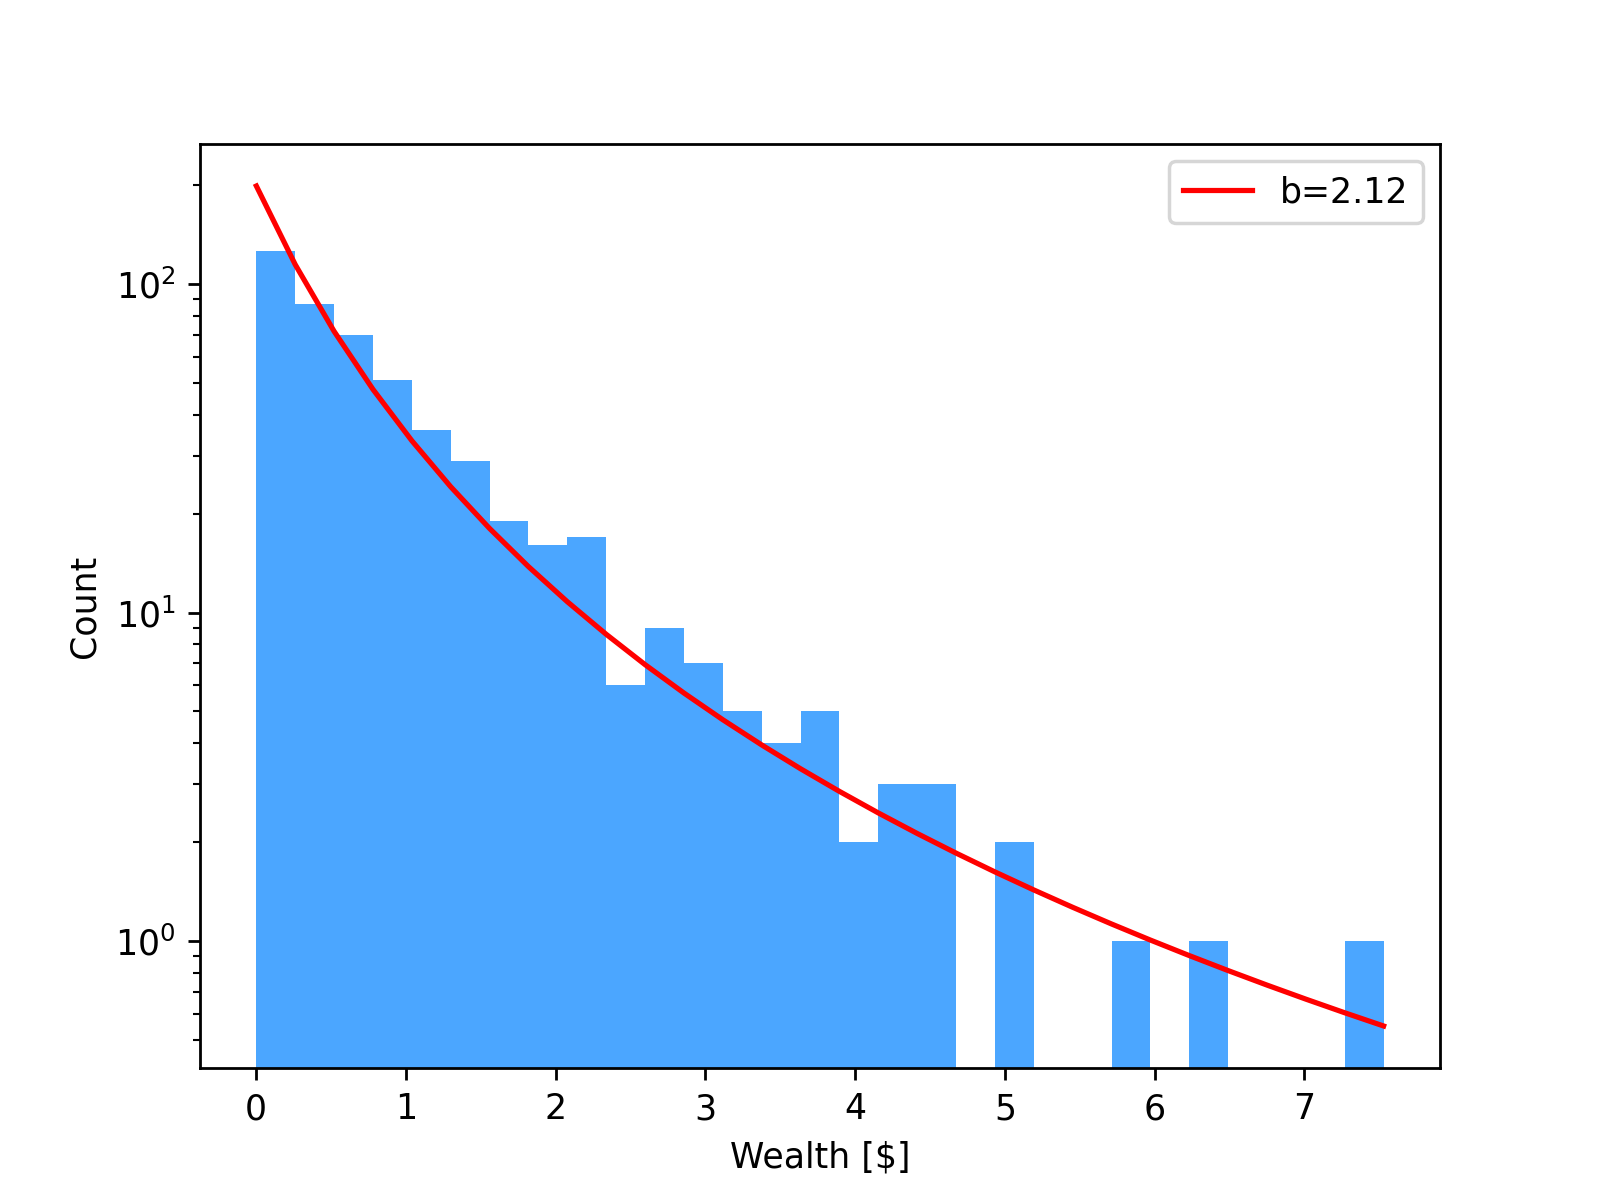

In [5]:
b, loc, scale = pareto.fit(df.wealth)
fig, ax = plt.subplots()
count, bins, _ = ax.hist(df.wealth, bins='auto', alpha=0.8, color='dodgerblue')
pdf = pareto.pdf(bins, b, loc=loc, scale=scale)
ax.plot(bins, max(count)*pdf, c='red', label=f'b={b:.2f}')
ax.set_yscale('log')
ax.set_ylabel('Count')
ax.set_xlabel('Wealth [$]')
ax.legend();

In [37]:
def agent_mc_run(num_transactions=1e5, num_agents=500, save_percent=0.0):
    df = pd.DataFrame({'ID':np.arange(num_agents, dtype=int), 'wealth':np.ones(num_agents)})
    for n in np.arange(num_transactions):
        transaction_df = df.sample(n=2)
        m_0 = transaction_df.iloc[0].wealth
        m_1 = transaction_df.iloc[1].wealth
        ID0 = transaction_df.iloc[0].ID
        ID1 = transaction_df.iloc[1].ID
        eps = np.random.rand(1)
        delta_m = (1.-save_percent) * (eps * m_1 - (1.-eps) * m_0)
        m_0_new = m_0 + delta_m
        m_1_new = m_1 - delta_m
        random0 = np.random.rand(1) 
        random1 = np.random.rand(1) 
        if m_0_new>0 and m_1_new>0:
            try:
                if random0<np.exp(-delta_m / m_0) and random1<np.exp(-delta_m / m_1):
                    df.at[int(ID0), 'wealth'] = m_0_new
                    df.at[int(ID1), 'wealth'] = m_1_new
            except RuntimeWarning:
                print(f'delta={delta_m:.6f}, m0={m_0:.6f}, m1={m_1:.6f}')
    return df

In [39]:
from joblib import Parallel, delayed
num_runs = 16
df_list = Parallel(n_jobs=-1, verbose=10)(delayed(agent_mc_run)(num_transactions=1e3, num_agents=500) for n in range(num_runs))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  16 | elapsed:    3.3s remaining:   14.7s
[Parallel(n_jobs=-1)]: Done   5 out of  16 | elapsed:    3.5s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done   7 out of  16 | elapsed:    3.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done   9 out of  16 | elapsed:    4.9s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    4.9s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:    5.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    5.2s finished


In [28]:
df_list[1]['ID'] = (df_list[1]['ID'] + 2*num_agents).astype(int)

In [36]:
df_list[1]

,ID,wealth
0,0,1.792346
1,1,1.795306
2,2,0.265873
3,3,1.557533
4,4,1.000000
...,...,...
495,495,0.273428
496,496,1.839767
497,497,0.060118
498,498,0.449591


In [22]:
len(df)

500